In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re 
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\vvagh\OneDrive - Indian Institute of Science Education and Research Bhopal\Documents\IITM Stuff\programming\project work\project 1\project data\project1-data_kerela_cleaned.csv')
df.isna().sum()

YEAR         0
AC           0
CANDIDATE    0
SEX          0
PARTY        0
VOTES        1
dtype: int64

In [3]:
df.dropna(inplace=True,ignore_index=True)
df.isna().sum()

YEAR         0
AC           0
CANDIDATE    0
SEX          0
PARTY        0
VOTES        0
dtype: int64

In [4]:
df

,YEAR,AC,CANDIDATE,SEX,PARTY,VOTES
0,1957,PARASSALA,KUNJUKRISHNAN NADAR M.,M,INC,16742.0
1,1957,PARASSALA,KRISHNA PILLAI K.,M,PSP,8338.0
2,1957,PARASSALA,STUART.,M,IND,5831.0
3,1957,PARASSALA,RETNASWAMY N.,M,CPI,5816.0
4,1957,PARASSALA,KUNJU MOOSA KUNJU I.,M,IND,4466.0
...,...,...,...,...,...,...
9742,2021,THODUPUZHA,PROF. K I ANTONY,M,KEC,47236.0
9743,2021,THODUPUZHA,SHYAMRAJ P,M,BJP,21263.0
9744,2021,THODUPUZHA,LEETHESH P T,M,BSP,934.0
9745,2021,THODUPUZHA,NOTA,NOTA,NOTA,674.0


In [5]:
len(df['YEAR'].unique())

16

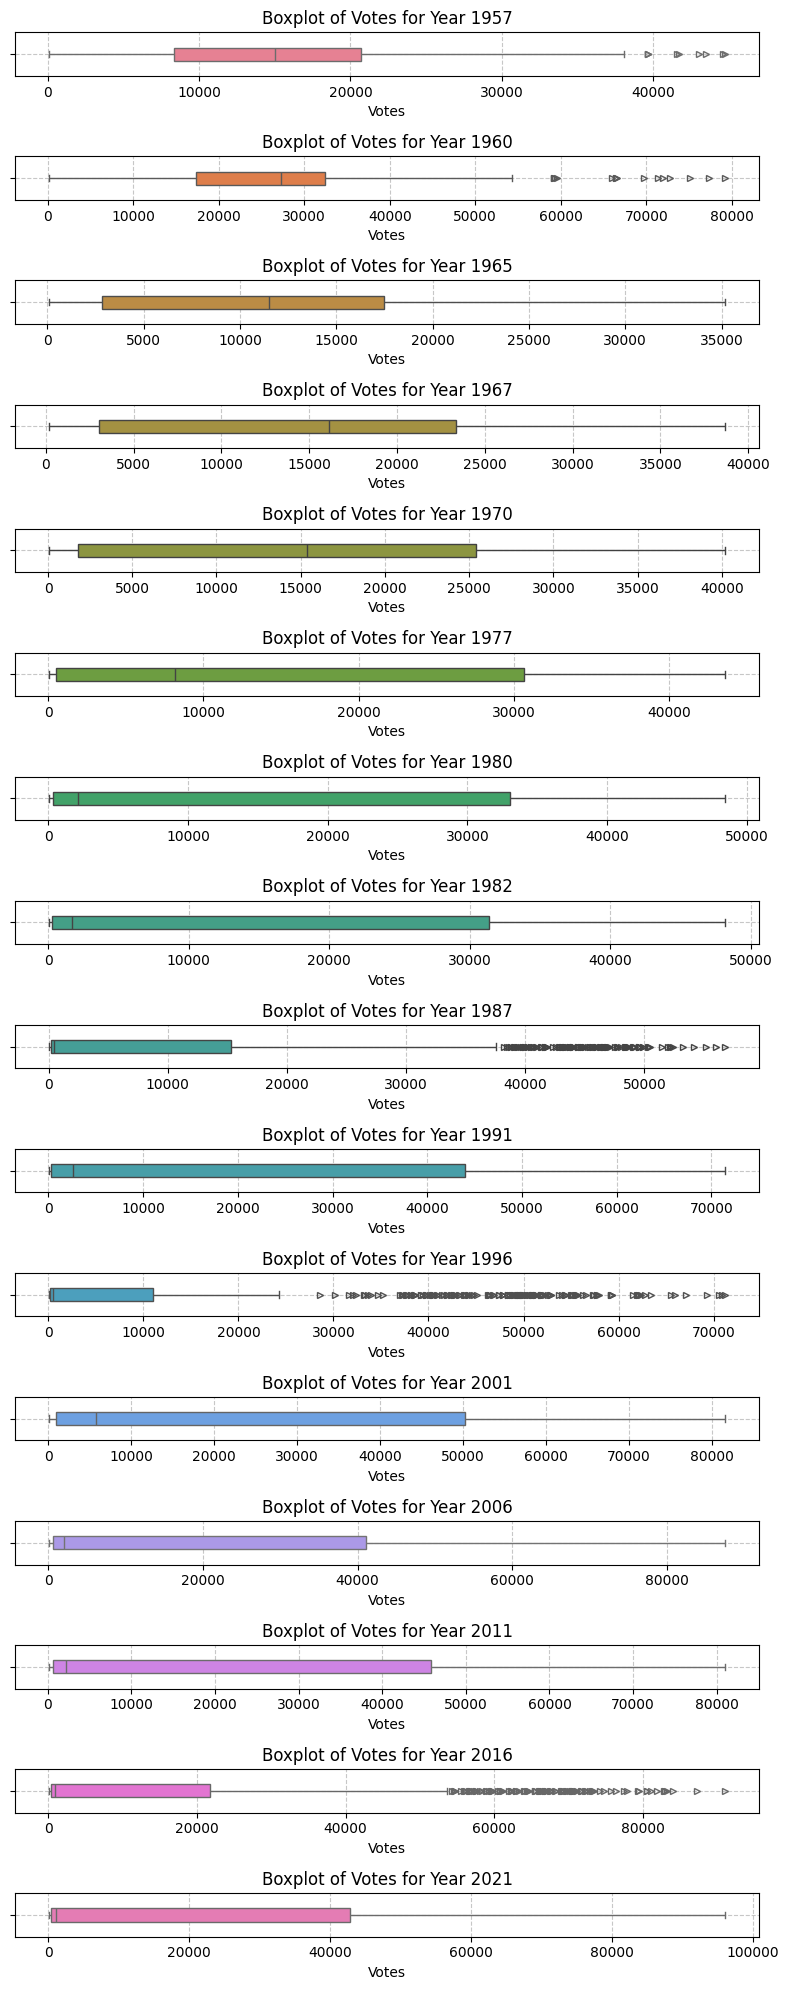

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotting_outliers(df):
    unique_years = df['YEAR'].unique()
    num_years = len(unique_years)
    
    #deifineing a color palette
    palette = sns.color_palette("husl", num_years)
    
    #creating a large figure
    plt.figure(figsize=(8, 20))
    
    for idx, year in enumerate(unique_years):
        df_year = df[df['YEAR'] == year].dropna(subset=['VOTES'])
        if df_year.empty:
            continue
        
        #Calculating IQR and limits
        iqr = df_year['VOTES'].quantile(0.75) - df_year['VOTES'].quantile(0.25)
        lower_limit = df_year['VOTES'].quantile(0.25) - 1.5 * iqr
        upper_limit = df_year['VOTES'].quantile(0.75) + 1.5 * iqr
        
        # the actual plot
        plt.subplot(num_years, 1, idx + 1)
        sns.boxplot(x=df_year['VOTES'], color=palette[idx],
                    flierprops=dict(marker=">",color="black", markersize=5),
                    width=0.3)  
        plt.title(f'Boxplot of Votes for Year {year}')
        plt.xlabel('Votes')
        plt.grid(True, linestyle='--', alpha=0.7)  # adding a grid
    plt.tight_layout()
    plt.show()

# Example usage with your DataFrame
plotting_outliers(df)


C:\Users\vvagh\AppData\Local\Temp\ipykernel_2072\3427859656.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='YEAR', y='VOTES', data=df, palette=palette, inner=None)


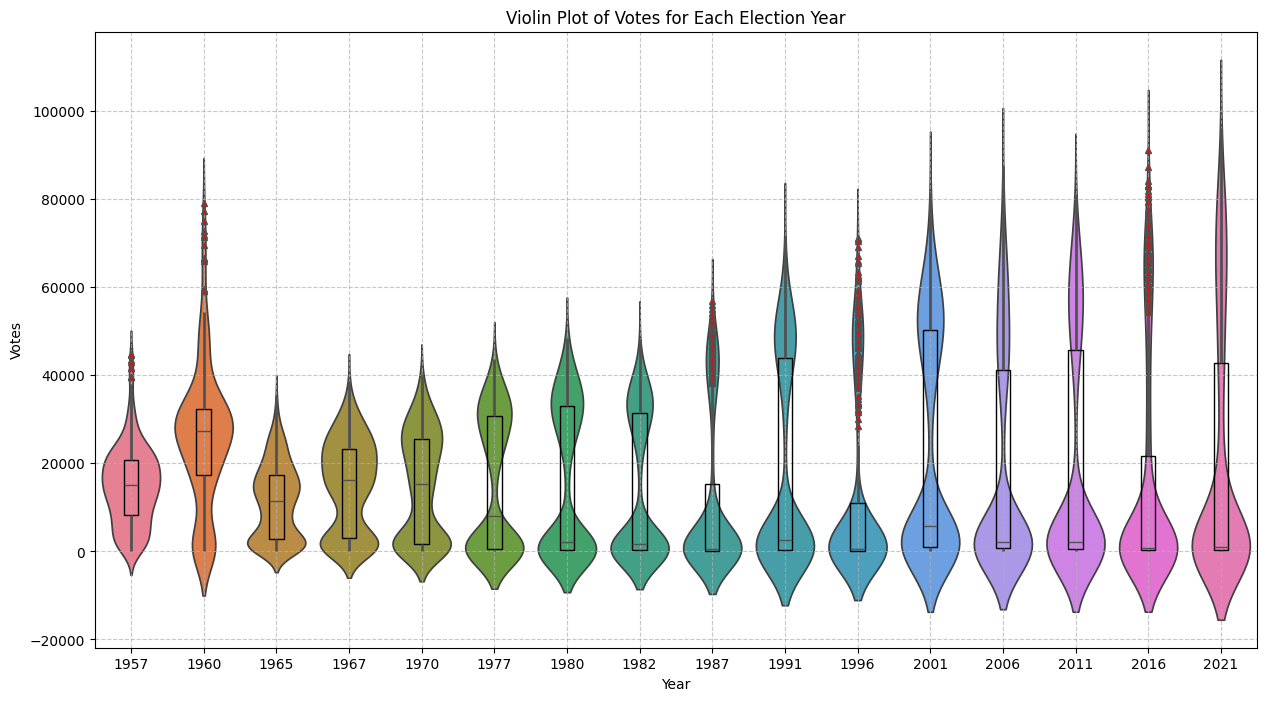

In [7]:
def plotting_violin(df):
    #set up the color palette
    unique_years = df['YEAR'].unique()
    palette = sns.color_palette("husl", len(unique_years))
    year_color_map = dict(zip(unique_years, palette))

    #plotting violin plots for each year
    plt.figure(figsize=(15, 8))
    sns.violinplot(x='YEAR', y='VOTES', data=df, palette=palette, inner=None)
    
    #overlay boxplot to highlight outliers
    sns.boxplot(x='YEAR', y='VOTES', data=df, whis=1.5, width=0.2, showcaps=False, 
                boxprops={'facecolor':'None', 'edgecolor':'k'}, showfliers=True, 
                flierprops={'marker':'^', 'markerfacecolor':'red', 'markersize':5},
                whiskerprops={'linewidth':2}, saturation=0.75)

    plt.title('Violin Plot of Votes for Each Election Year')
    plt.xlabel('Year')
    plt.ylabel('Votes')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Example usage with a sample DataFrame
#data = {
#    'YEAR': [2021, 2021, 2021, 2022, 2022, 2022],
#    'VOTES': [300, 400, 500, 600, 700, 800],
#    'AC': ['A', 'B', 'C', 'A', 'B', 'C']
#}
#df = pd.DataFrame(data)

plotting_violin(df)


In [8]:
df['CANDIDATE'] = df['CANDIDATE'].apply(lambda x: re.sub(r'[^a-zA-Z]', '', x))
df = df[df['CANDIDATE'] != 'NOTA']

In [9]:
df['name_lenght'] = df['CANDIDATE'].apply(len)

df = df[df['CANDIDATE'] != 'NOTA']
df['CANDIDATE'] = df['CANDIDATE'].apply(lambda x: str(x).split(' '))
df['CANDIDATE'] = df['CANDIDATE'].apply(lambda x: ''.join(x))
df['name_length'] = df['CANDIDATE'].apply(lambda x: len(x))

In [13]:
df

,YEAR,AC,CANDIDATE,SEX,PARTY,VOTES,name_lenght
0,1957,PARASSALA,KUNJUKRISHNANNADARM,M,INC,16742.0,19
1,1957,PARASSALA,KRISHNAPILLAIK,M,PSP,8338.0,14
2,1957,PARASSALA,STUART,M,IND,5831.0,6
3,1957,PARASSALA,RETNASWAMYN,M,CPI,5816.0,11
4,1957,PARASSALA,KUNJUMOOSAKUNJUI,M,IND,4466.0,16
...,...,...,...,...,...,...,...
9742,2021,THODUPUZHA,PROFKIANTONY,M,KEC,47236.0,12
9743,2021,THODUPUZHA,SHYAMRAJP,M,BJP,21263.0,9
9744,2021,THODUPUZHA,LEETHESHPT,M,BSP,934.0,10
9745,2021,THODUPUZHA,NOTA,NOTA,NOTA,674.0,4


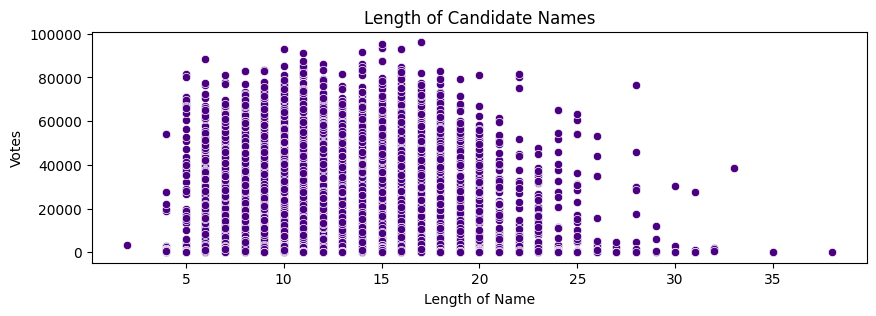

In [11]:
fig, ax = plt.subplots(figsize=(10,3))
sns.scatterplot(x='name_lenght',y='VOTES', data=df, color='indigo')
plt.title('Length of Candidate Names')
plt.ylabel('Votes')
plt.xlabel('Length of Name')
plt.show()